# Books Read in 2018

## Prep
Imports and set variables

In [1]:
import pandas as pd
import numpy as np
import seaborn
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
YEAR = 2018
JAN1 = '1/1/{}'.format(YEAR)

## Get Data
Export bookshelves from Goodreads as a CSV file named books.csv and read it in.

Go to https://www.goodreads.com/review/import and click "Export Library". Rename to **books.csv**.

In [3]:
books = pd.read_csv('books.csv')
books['Date Read'] = pd.to_datetime(books['Date Read'])

## Prep Data
Fix data issues specific to current year

In [4]:
# On Grand Strategy is missing Original Publication Year in Goodreads export.
books.at[books[books['Title'].str.startswith('On Grand Strategy')].index.values[0], 
          'Original Publication Year'] = 2018

Add Start Dates to books. The start date is in the Goodreads database, but it is not in the Export file. So, these dates need to be added manually. To simplify this, a start dict is created which can be copy/pasted as part of the next step. 

In [5]:
print('{',sep='')
for bk in books[(books['Date Read'] >= JAN1) | 
                (books['Exclusive Shelf'] == 
                 'currently-reading')]['Title'].values:
    print ('"{}":"{}",'.format(bk, JAN1))
print('}')

{
"Mindware: Tools for Smart Thinking":"1/1/2018",
"Churchill and Orwell: The Fight for Freedom":"1/1/2018",
"The Big Picture: On the Origins of Life, Meaning, and the Universe Itself":"1/1/2018",
"Astrophysics for People in a Hurry":"1/1/2018",
"The Checklist Manifesto: How to Get Things Right":"1/1/2018",
"Meditation for Fidgety Skeptics: A 10% Happier How-To Book":"1/1/2018",
"Getting Things Done: The Art of Stress-Free Productivity":"1/1/2018",
"The DevOps Handbook: How to Create World-Class Agility, Reliability, and Security in Technology Organizations":"1/1/2018",
"How to Change Your Mind: What the New Science of Psychedelics Teaches Us About Consciousness, Dying, Addiction, Depression, and Transcendence":"1/1/2018",
"Palace of Treason (Red Sparrow Trilogy #2)":"1/1/2018",
"The Coddling of the American Mind: How Good Intentions and Bad Ideas Are Setting Up a Generation for Failure":"1/1/2018",
"The Coming Storm":"1/1/2018",
"The Kremlin's Candidate (Red Sparrow Trilogy #3)":"1/1/

Copy the above text and paste it below. Set it equal to **start_dates**. Replace the "1/1/00" with the correct start dates. This is required because the start date is not in the downloaded CSV. It must be manually retrieved. This can be done by going to the Read list and via settings adding a column for Date Started. 

In [6]:
start_dates = {"Mindware: Tools for Smart Thinking":"8/24/2018",
               "The Kremlin's Candidate (Red Sparrow Trilogy #3)":"9/17/2018",
               "The Coddling of the American Mind: How Good Intentions and Bad Ideas Are Setting Up a Generation for Failure":"10/14/2018",
               "21 Lessons for the 21st Century":"9/5/2018",
               "Bad Blood: Secrets and Lies in a Silicon Valley Startup":"8/17/2018",
               "The Fifth Risk":"10/2/2018",
               "Fear: Trump in the White House":"9/11/2018",
               "Palace of Treason (Red Sparrow Trilogy #2)":"7/1/2018",
               "The Coming Storm":"9/8/2018",
               "On Grand Strategy":"8/8/2018",
               "How to Change Your Mind: What the New Science of Psychedelics Teaches Us About Consciousness, Dying, Addiction, Depression, and Transcendence":"6/21/2018",
               "Red Sparrow (Red Sparrow Trilogy #1)":"6/25/2018",
               "1984":"6/1/2018",
               "Churchill and Orwell: The Fight for Freedom":"5/1/2018",
               "Meditation for Fidgety Skeptics: A 10% Happier How-To Book":"5/9/2018",
               "The DevOps Handbook: How to Create World-Class Agility, Reliability, and Security in Technology Organizations":"3/21/2018",
               "Getting Things Done: The Art of Stress-Free Productivity":"2/28/2018",
               "Why Buddhism is True: The Science and Philosophy of Meditation and Enlightenment":"2/9/2018",
               "The Checklist Manifesto: How to Get Things Right":"2/2/2018",
               "Astrophysics for People in a Hurry":"1/27/2018",
               "History of Wolves":"2/3/2018",
               "The Big Picture: On the Origins of Life, Meaning, and the Universe Itself":"1/11/2018",
               "The Cartel (Power of the Dog #2)":"12/27/2017",
               "The Upside of Irrationality: The Unexpected Benefits of Defying Logic at Work and at Home":"12/26/2018",
               "Cure: A Journey into the Science of Mind Over Body":"6/4/2017",
               "What If?: Serious Scientific Answers to Absurd Hypothetical Questions":"6/25/2015",
               "Good to Great: Why Some Companies Make the Leap... and Others Don't":"10/5/2016",
               "On Killing: The Psychological Cost of Learning to Kill in War and Society":"12/11/2015",
               "Work Rules!: Insights from Inside Google That Will Transform How You Live and Lead":"10/31/2014"}

Verify that you filled in all of the dates

In [7]:
all_updated = True
for t, d in start_dates.items():
    if d == JAN1:
        print('Unchanged: ', t)
        all_updated = False
if all_updated:
    print('All start dates have been updated.')

All start dates have been updated.


Populate the Date Started column.

In [8]:
books['Date Started'] = books['Title'].map(start_dates)
books['Date Started'] = pd.to_datetime(books['Date Started'])

Remove unnecessary columns

In [9]:
for c in ('ISBN','ISBN13','Publisher','Binding', 'Book Id', 'My Review', 
          'Spoiler', 'Private Notes','Recommended For', 'Recommended By', 
          'Owned Copies', 'Original Purchase Date', 'Original Purchase Location', 
          'Condition', 'Condition Description', 'BCID'):
    try:
        del books[c]
    except:
        pass

## Filter Books
Downselect list of books that were either finished in current year or were started in current year and not finished. 

In [10]:
date_columns = ['Date Read', 'Date Added', 
                'Date Started']
for c in date_columns:
    books[c] = pd.to_datetime(books[c])

In [11]:
books = books.dropna(subset=['Date Read', 'Date Started'], how='all')

In [12]:
books = books[(books['Date Read'] >= JAN1)
              | ((books['Exclusive Shelf'] =='currently-reading')
                 & (books['Date Started'] >= JAN1))]

Manual removal. This is where can manually remove books you do not want in the plots.

In [13]:
to_remove = ['The Coming Storm',
             'History of Wolves',
             'The Upside of Irrationality: The Unexpected Benefits of Defying Logic at Work and at Home']
books = books.drop(books[books.Title.isin(to_remove)].index)

In [14]:
books['Finished'] = books['Date Read'].notnull()
# if book has not been finished, set Date Read to Dec 31. This is done for plotting purposes. 
books['Date Read'] = books['Date Read'].fillna(datetime.datetime(YEAR,12,31))

## List the Books

In [15]:
books_ = books[books['Finished'] == True].reset_index(drop=True)
books_['Original Publication Year'] = books_['Original Publication Year'].fillna(0)
books_.sort_values(by='Date Read',ascending=True,inplace=True)
for row in books_.iterrows():
    row = row[1]
    print ('%s by %s (%i)'%(row['Title'],row['Author'],row['Original Publication Year']))

The Cartel (Power of the Dog #2) by Don Winslow (2015)
The Big Picture: On the Origins of Life, Meaning, and the Universe Itself by Sean Carroll (2016)
Astrophysics for People in a Hurry by Neil deGrasse Tyson (2017)
The Checklist Manifesto: How to Get Things Right by Atul Gawande (2009)
Why Buddhism is True: The Science and Philosophy of Meditation and Enlightenment by Robert Wright (2017)
Getting Things Done: The Art of Stress-Free Productivity by David    Allen (2001)
The DevOps Handbook: How to Create World-Class Agility, Reliability, and Security in Technology Organizations by Gene Kim (2015)
Meditation for Fidgety Skeptics: A 10% Happier How-To Book by Jeff Warren (2017)
Churchill and Orwell: The Fight for Freedom by Thomas E. Ricks (2017)
1984 by George Orwell (1949)
Red Sparrow (Red Sparrow Trilogy #1) by Jason  Matthews (2013)
How to Change Your Mind: What the New Science of Psychedelics Teaches Us About Consciousness, Dying, Addiction, Depression, and Transcendence by Michael

## Calculations
Calculate Time to Read

In [16]:
# Add a day to make it inclusive
books['Time to Read'] = (books['Date Read'] - books['Date Started']) + datetime.timedelta(days=1)
# if book has not been finished then set Time to Read to 0 days.
books['Time to Read'] = books['Time to Read'].where(books['Finished'] == True, datetime.timedelta(days=0))

Calculate Pages Read per Day

In [17]:
books['Pages per Day'] = books['Number of Pages'] / [x.days for x in books['Time to Read']]

Create a short title for some of the plots.

In [18]:
books['Title (short)'] = books['Title'].apply(lambda x: x.split(':')[0])
books['Title (short)'] = books['Title (short)'].str.replace(r" \(.*\)","")

Sort books

In [19]:
books.sort_values(by='Date Started',ascending=True,inplace=True)

## Plotting

In [20]:
finished_color, unfinished_color = "#4C72B0","#CCB974"
mapper = {True:finished_color,False:unfinished_color}
s = books['Finished'].map(mapper)
s[books['Date Started'] < datetime.datetime(YEAR,1,1)] = "#55A868"
clist = list(s)

In [21]:
import matplotlib.style as style
style.use('seaborn')

### Books Across the Year

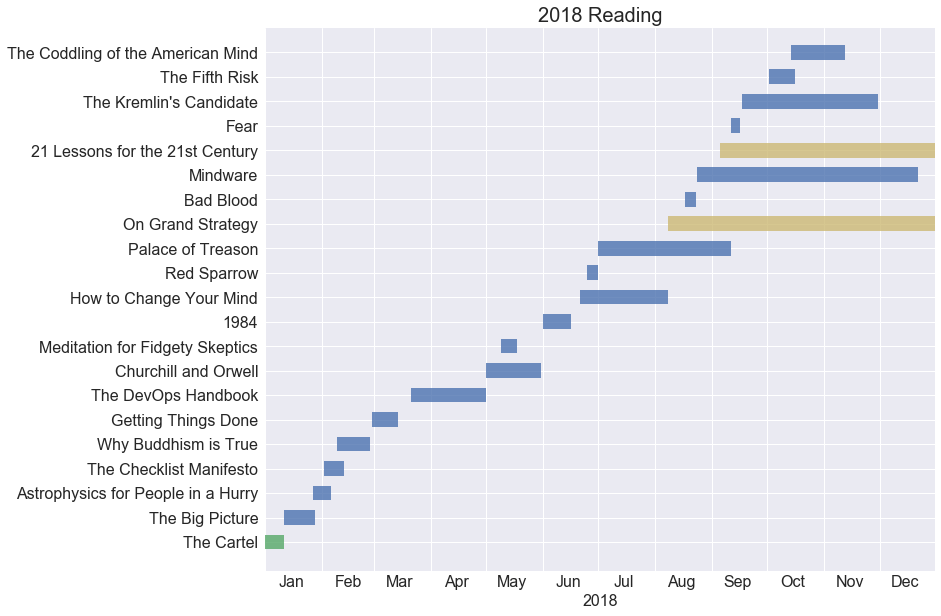

In [22]:
def _create_date(date):
    """Creates the date"""
    try:
        date = pd.to_datetime(date)
    except:
        pass
    if date < datetime.datetime(YEAR, 1, 1):
        date = datetime.datetime(YEAR, 1, 1)
    mdate = dates.date2num(date) 
    return mdate

ylabels = list(books['Title (short)'])
start_dates = list(books['Date Started'])
end_dates = list(books['Date Read'])

ilen = len(ylabels)
pos = np.arange(0.5,ilen*0.5+0.5,0.5)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
for i in range(ilen):
    start_date,end_date = _create_date(start_dates[i]), _create_date(end_dates[i])
    ax.barh((i*0.5)+0.5, end_date - start_date, label=ylabels[i], left=start_date, height=0.3, 
            align='center', alpha = 0.8, color=clist[i])
locsy, labelsy = plt.yticks(pos,ylabels)
plt.setp(labelsy, fontsize = 16)
ax.set_ylim(ymin = -0.1, ymax = ilen*0.5+0.5)

ax.xaxis_date()
ax.set_xlim(xmin=_create_date(datetime.datetime(YEAR, 1, 1)),
           xmax=_create_date(datetime.datetime(YEAR, 12, 31)))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

plt.title('{} Reading'.format(YEAR), fontsize=20)
plt.xlabel(YEAR, fontsize=16)

for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(16) 
    
plt.savefig('books_timeline_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Book Ratings

Average Personal Goodread Rating: 3.8947368421052633
Average Site Goodread Rating: 4.117894736842104


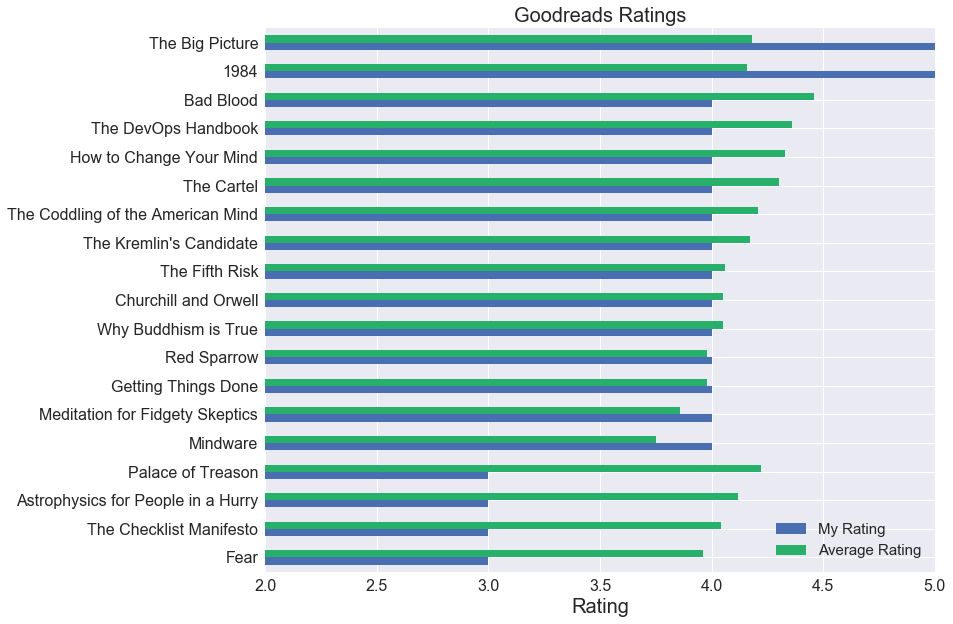

In [23]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)',drop=True).sort_values(by=['My Rating',
                                                                     'Average Rating'],ascending=True)
ax = books_[['My Rating','Average Rating']].plot(kind='barh',
                                                 xlim=(2,5),
                                                 figsize=(12,10),
                                                 fontsize=16,
                                                 color=('#4A6EB2', '#26B069'))
ax.yaxis.label.set_visible(False)
plt.xlabel('Rating', fontsize=20)
plt.title('Goodreads Ratings', fontsize=20);
mpl.rcParams['legend.fontsize'] = 'large'
print ('Average Personal Goodread Rating:',books_['My Rating'].mean())
print ('Average Site Goodread Rating:',books_['Average Rating'].mean())
plt.legend(fontsize=15)

plt.savefig('ratings_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Number of Pages

Total Number of Pages: 6952.0


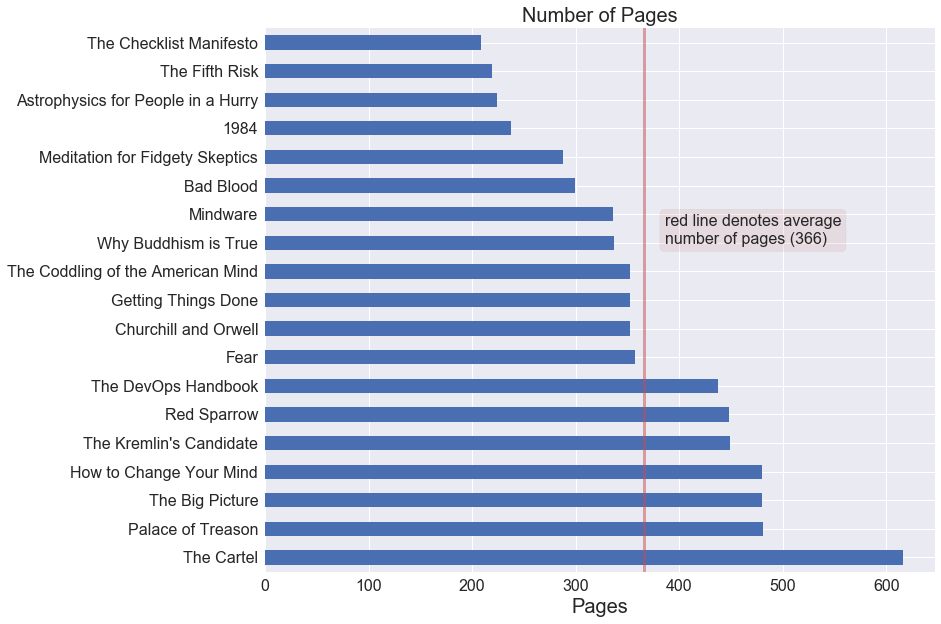

In [24]:
books_ = books[books['Finished'] == True]
avg = books_['Number of Pages'].mean()
books_ = books_.set_index('Title (short)')
ax = books_['Number of Pages'].sort_values(ascending=False).plot(kind='barh',
                                                                 title='Number of Pages',
                                                                 figsize=(12,10),
                                                                 fontsize=16,
                                                                 color='#4A6EB2')
ax.yaxis.label.set_visible(False)

plt.axvline(x=avg,linewidth=3, color="#C44E52",alpha=0.5)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+20, 12, 'red line denotes average\nnumber of pages ({:.0f})'.format(avg),
        verticalalignment='top',horizontalalignment='left', bbox=props, fontsize=16)
plt.xlabel('Pages', fontsize=20)
plt.title('Number of Pages', fontsize=20)
print ('Total Number of Pages:',books_['Number of Pages'].sum())

plt.savefig('num_pages_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

/Users/lukestarnes/miniconda3/envs/py3.6_sfte/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/lukestarnes/miniconda3/envs/py3.6_sfte/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


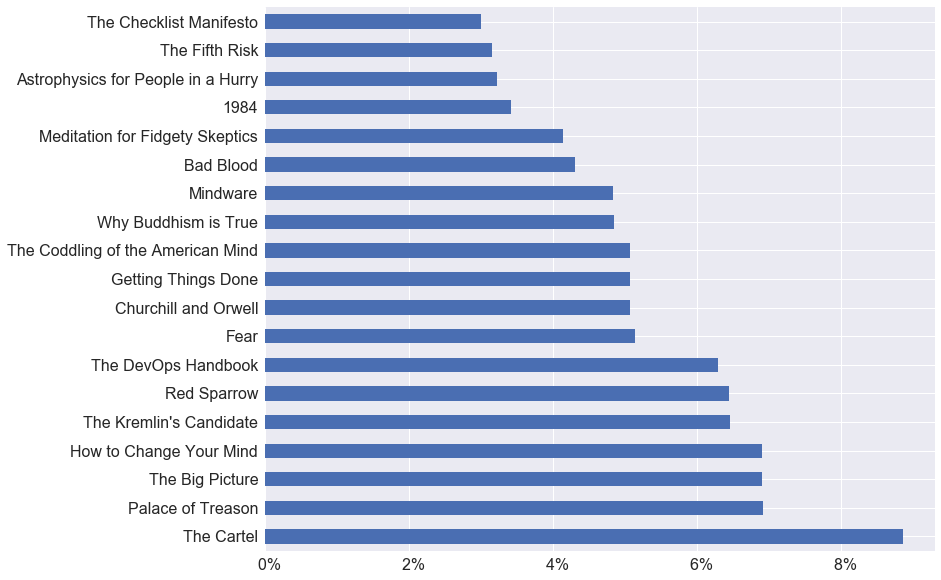

In [25]:
books_ = books[books['Finished'] == True]

books_.at[:,'Percent'] = books_['Number of Pages']/books_['Number of Pages'].sum()
books_ = books_.set_index('Title (short)')
ax = books_['Percent'].sort_values(ascending=False).plot(kind='barh', 
                                                         figsize=(12,10),
                                                         fontsize=16,
                                                         color='#4A6EB2')
ax.yaxis.label.set_visible(False)
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);

Average Number of Pages over Year: 19.046575342465754


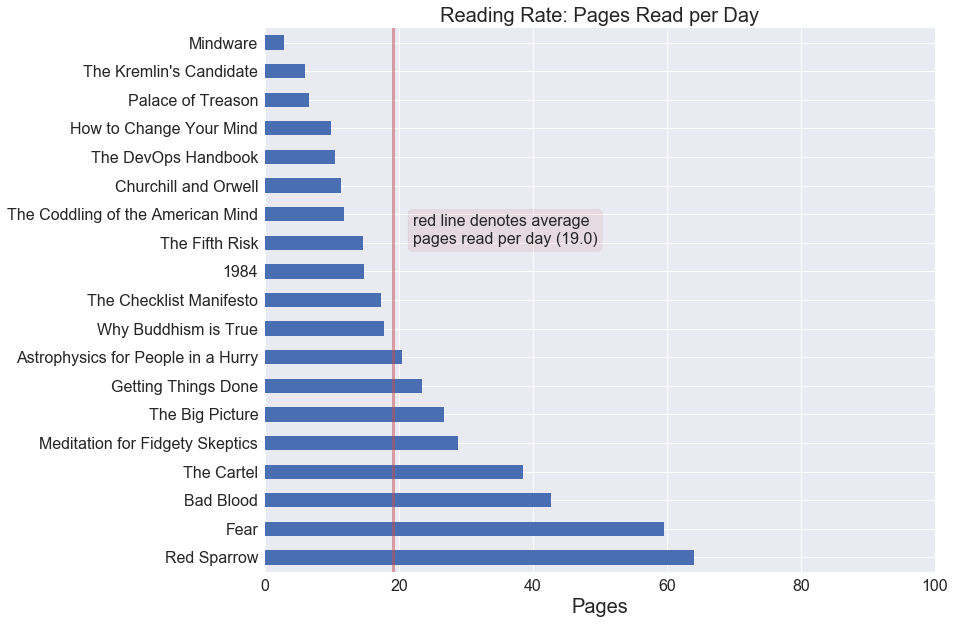

In [26]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)')
avg = books_['Number of Pages'].sum()/365
ax = books_['Pages per Day'].sort_values(ascending=False).plot(kind='barh',
                                                               xlim=(0,100),
                                                               figsize=(12,10),
                                                               fontsize=16,
                                                               color='#4A6EB2')
ax.yaxis.label.set_visible(False)
plt.title('Reading Rate: Pages Read per Day', fontsize=20)
# BELOW code used if one is "off the charts" and the x scale needs to be set such that one is too long
# mpd = books_.loc[XXX,'Pages per Day']
# mpd = str(mpd)+'->'
# ax.text(90,0.2,mpd,color='white',fontdict={'size':8,'weight':'bold'},
#         verticalalignment='top',horizontalalignment='left')

plt.axvline(x=avg,linewidth=3, color="#C44E52",alpha=0.5)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+3, 12, 'red line denotes average\npages read per day ({:.1f})'.format(avg),
        verticalalignment='top',horizontalalignment='left', bbox=props, fontsize=16)
plt.xlabel('Pages', fontsize=20)
print ('Average Number of Pages over Year:',avg)

plt.savefig('pages_per_day_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Publication Dates

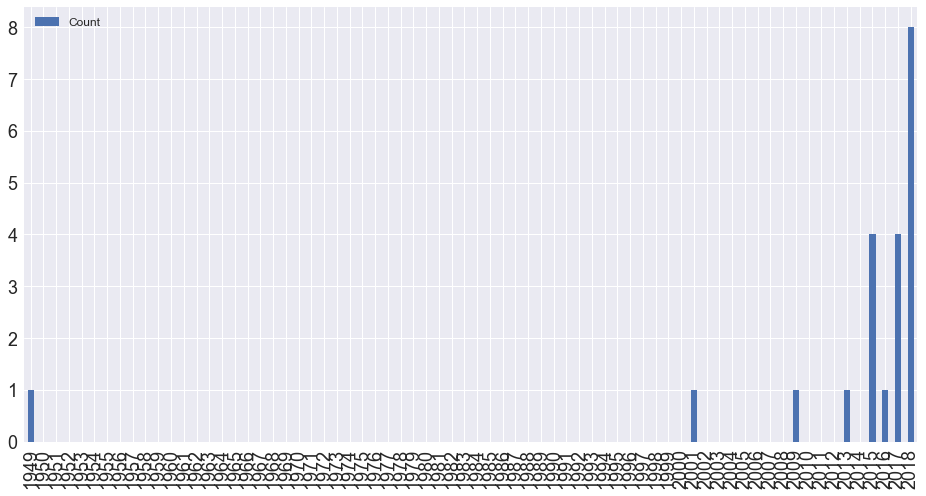

In [27]:
books_ = books.copy()
books_['T'] = books_.index
books_.reset_index(drop=True,inplace=True)
books_ = books_[['Original Publication Year','T']]
books_['Original Publication Year'] = books_['Original Publication Year'].astype(int)

years = list(range(books_['Original Publication Year'].min(), 
                   books_['Original Publication Year'].max()+1))
occurs = books_['Original Publication Year'].value_counts()
occurs_ = pd.DataFrame(index=years, columns=['Count'])
occurs_['Count'] = occurs
occurs = occurs_.fillna(0) 
ax = occurs.plot(kind='bar',figsize=(16,8),fontsize=16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)

## Some Stats
Average Number of Pages per Day over Year

In [28]:
# prorate carry-over books
books_ = books[books['Finished'] == True]
carry_overs = books_[books_['Date Started'] < JAN1]
new_start = datetime.datetime(YEAR,1,1)

carry_overs.loc[:,'Number of Pages'] = (carry_overs['Number of Pages'] * 
                                        (((carry_overs['Date Read'] - 
                                           new_start).map(lambda x: x.days) +1) / 
                                         ((carry_overs['Date Read'] - 
                                           carry_overs['Date Started']).map(lambda x: x.days)+1))).values
books_['Number of Pages'].update(carry_overs['Number of Pages'])
print ('Average Number of Pages per Day over Year:',books_['Number of Pages'].sum()/365)

Average Number of Pages per Day over Year: 18.519178082191782


/Users/lukestarnes/miniconda3/envs/py3.6_sfte/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/lukestarnes/miniconda3/envs/py3.6_sfte/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
